In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings

In [56]:
data = pd.read_csv('osteoporosis.csv')

In [57]:
data.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [59]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [60]:
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [61]:
data['Alcohol Consumption'] = data['Alcohol Consumption'].fillna(data['Alcohol Consumption'].mean())
data['Medical Conditions'] = data['Medical Conditions'].fillna(data['Medical Conditions'].mean())
data['Medications'] = data['Medications'].fillna(data['Medications'].mean())


In [62]:
X = data.drop(columns=['Osteoporosis', 'Id'])
y = data['Osteoporosis']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       196
           1       0.86      0.72      0.78       196

    accuracy                           0.80       392
   macro avg       0.81      0.80      0.80       392
weighted avg       0.81      0.80      0.80       392



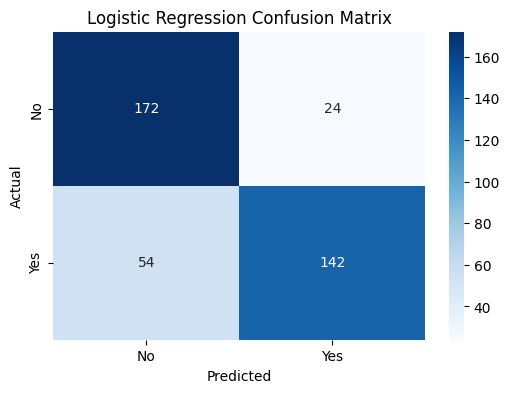


Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       196
           1       0.94      0.71      0.81       196

    accuracy                           0.83       392
   macro avg       0.85      0.83      0.83       392
weighted avg       0.85      0.83      0.83       392



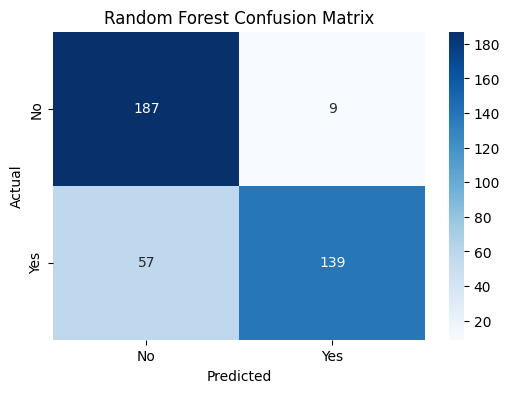


Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       196
           1       0.80      0.82      0.81       196

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392



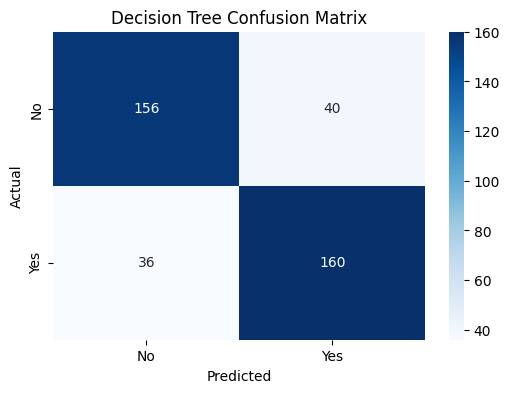


Training SVM...

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       196
           1       0.94      0.68      0.79       196

    accuracy                           0.82       392
   macro avg       0.84      0.82      0.82       392
weighted avg       0.84      0.82      0.82       392



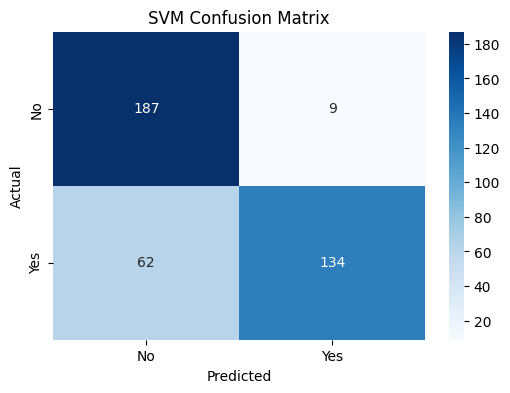

In [66]:
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Classification report and confusion matrix
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest  0.831633   0.939189  0.709184  0.808140
2        Decision Tree  0.806122   0.800000  0.816327  0.808081
3                  SVM  0.818878   0.937063  0.683673  0.790560
0  Logistic Regression  0.801020   0.855422  0.724490  0.784530


C:\Users\Jenish\AppData\Local\Temp\ipykernel_1756\1433240417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


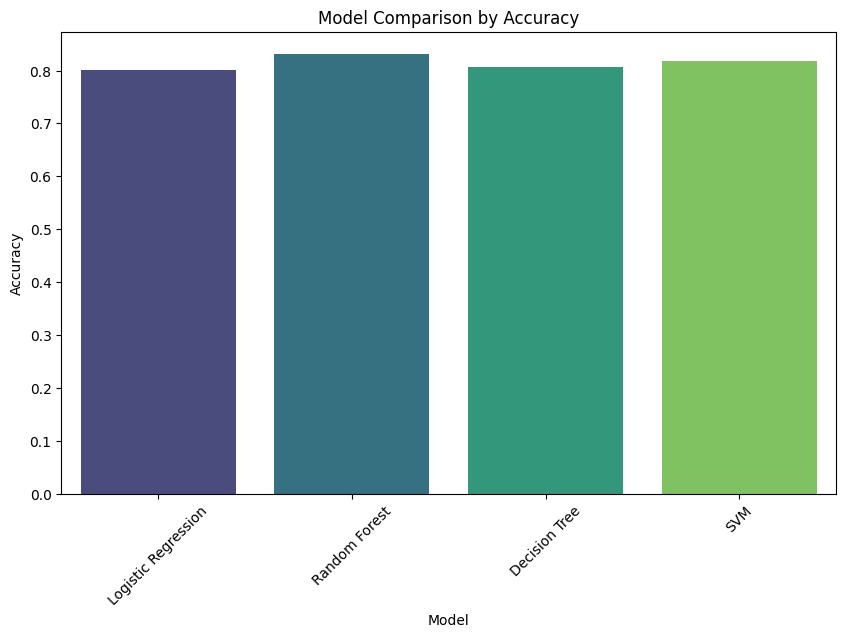

C:\Users\Jenish\AppData\Local\Temp\ipykernel_1756\1433240417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


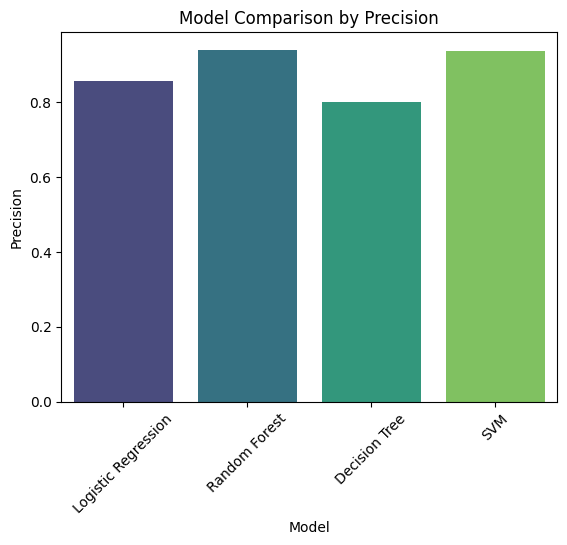

C:\Users\Jenish\AppData\Local\Temp\ipykernel_1756\1433240417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


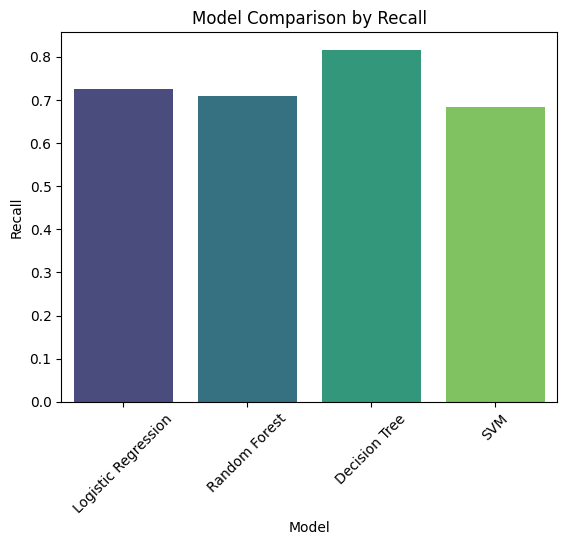

C:\Users\Jenish\AppData\Local\Temp\ipykernel_1756\1433240417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


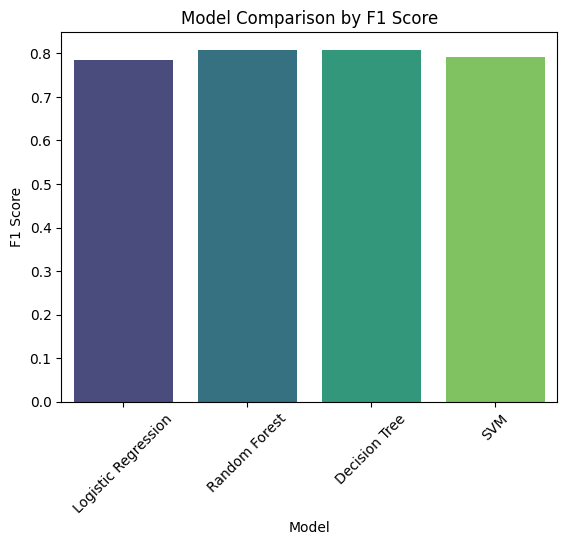

In [67]:
results_df = pd.DataFrame(results)

# Display comparison
print("\nModel Comparison:")
print(results_df.sort_values(by='F1 Score', ascending=False))

# Visualizing model performance
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f"Model Comparison by {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


                Feature  Importance
0                   Age    0.643480
4        Race/Ethnicity    0.042302
11   Medical Conditions    0.040616
10  Alcohol Consumption    0.027915
3        Family History    0.027282
12          Medications    0.025823
2      Hormonal Changes    0.025345
13      Prior Fractures    0.025042
9               Smoking    0.024801
8     Physical Activity    0.024108
1                Gender    0.024015
6        Calcium Intake    0.023330
5           Body Weight    0.023093
7      Vitamin D Intake    0.022846


C:\Users\Jenish\AppData\Local\Temp\ipykernel_1756\1036388241.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


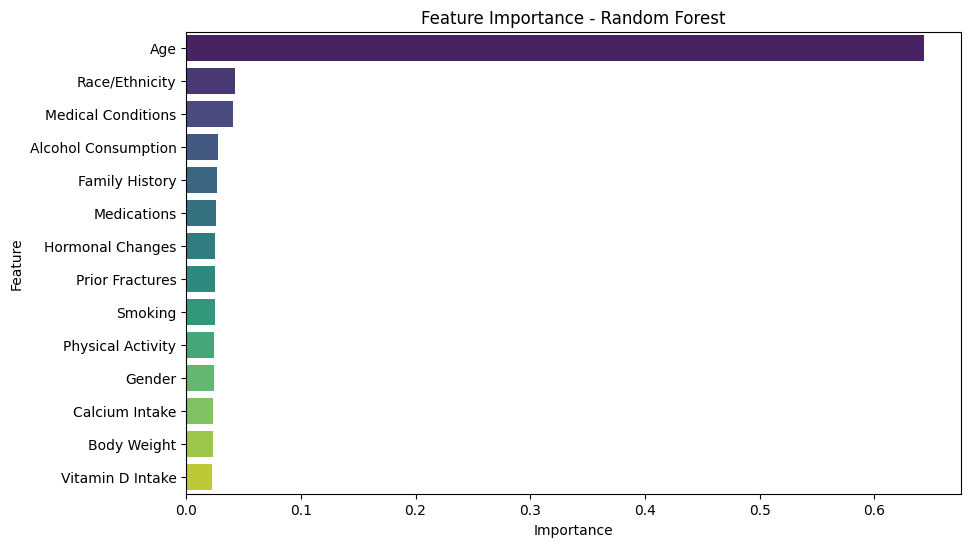

In [68]:
# Feature importance from RandomForest
random_forest = models['Random Forest']
random_forest.fit(X_train, y_train)

# Getting feature importance
feature_importances = random_forest.feature_importances_
features = X.columns

# Creating a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sorting features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying feature importance
print(feature_importance_df)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
